# 3D Visualization of a Protein Structure Network Using Plotly
---

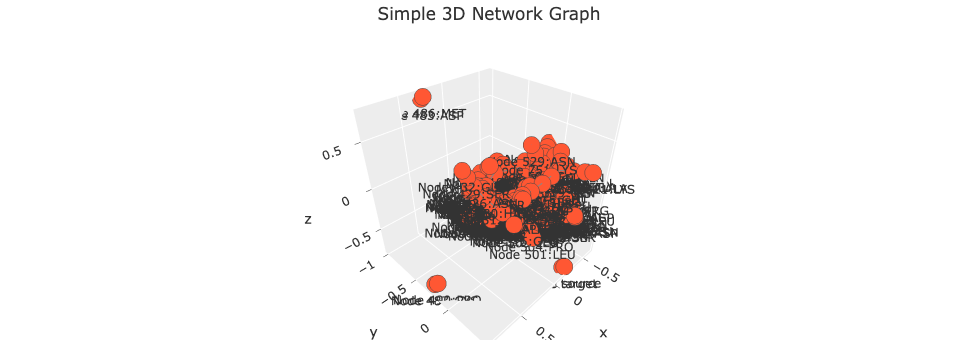

In [3]:
# Import necessary libraries
import plotly.graph_objs as go
import networkx as nx
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Create a simple graph
edge_list_file = "./data/1yok.txt"  # Replace with your file path

# Read edge list file and process data
edges = []
with open(edge_list_file, "r") as file:
    for line in file:
        source, target, *_ = line.strip().split()  # Assuming at least two columns separated by space or tab
        edges.append((source, target))

G = nx.Graph()
G.add_edges_from(edges)


# Assign random positions to nodes in 3D space
pos = nx.spring_layout(G, dim=3, seed=42)

# Extract node positions
node_x = []
node_y = []
node_z = []
for node in G.nodes():
    x, y, z = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)

# Create edge traces
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# Create Plotly traces
edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers+text',
    text=[f'Node {node}' for node in G.nodes()],
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='#FF5733',
        size=10,
        line=dict(width=2)
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Simple 3D Network Graph',
                    showlegend=False,
                    margin=dict(b=20, l=5, r=5, t=40),
                ))

fig.update_layout(template='ggplot2')

fig.show()
